# Homework 2

**DUE NOV 11th at 11:59 PM**

You are expected to turn in a **pdf version** of this notebook with all your **codes, results, and figures** (Use the print option). Make sure the figures and results are visible as you want them to appear in the pdf before turning it in. Please do not modify the instructions as doing so will limit our ability to follow and grade your answers.

## Problem 1 (HW1 Problem 4)

In this problem, you will work on the clustering problem using Bottom-up Agglomerative clustering and K-mean clustering.

a) A 4-D dataset is given in **'iris.csv'** with the last column being the ground truth label. Load the file. Store the data in a variable ***X*** and store the label in a variable ***y***. Because clustering is an unsupervised task, there is no need for the labels during training.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("/home/nbuser/.local/lib/python2.7/site-packages")
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
iris_ds = pd.read_csv('/content/drive/My Drive/iris.csv')
X = iris_ds.iloc[:, 0:4].values #data
y = iris_ds["Setosa"] #label

b) Train a clustering model using Bottom-up Agglomerative clustering.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.decomposition import PCA 
import scipy.cluster.hierarchy as shc

Visualize your clusters on a 2-D plot. Choose any 2 dimensions from the 4 dimensions to plot. Try to pick the 2 dimensions that best separate the data. Your plot should contains all the data points with points from the same predicted cluster haveing the same color. 

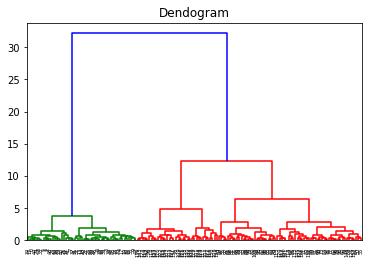

In [ ]:
plt.title("Dendogram")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

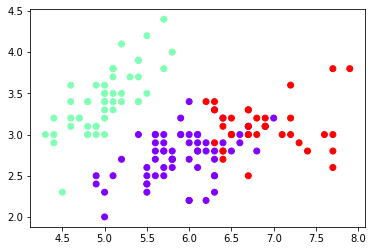

In [ ]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow')

Repeat the visualization step above using the same 2 dimensions. This time, plot according to the ground truth classes. Comment on the performance of your model.

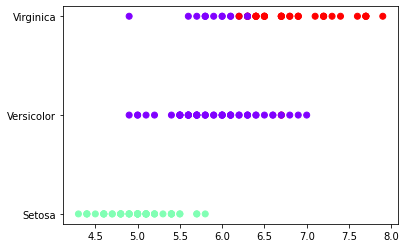

In [ ]:
plt.scatter(X[:,0], y, c=cluster.labels_, cmap='rainbow')

c) Train a clustering model using K-mean clustering.

In [ ]:
from sklearn.cluster import KMeans

X = iris_ds.iloc[:, [0,1,2,3]].values
y = iris_ds["Setosa"] #label
kmeans5 = KMeans(n_clusters=3)
y_kmeans5 = kmeans5.fit_predict(X)

Visualize your clusters on a 2-D plot. Choose any 2 dimensions from the 4 dimensions to plot. Try to pick the 2 dimensions that best separate the data. Your plot should contains all the data points with points from the same predicted cluster haveing the same color.

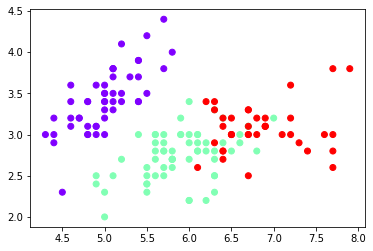

In [ ]:
kmeans5.cluster_centers_

plt.scatter(X[:,0], X[:,1], c=kmeans5.labels_, cmap='rainbow')

Repeat the visualization step above using the same 2 dimensions. This time, plot according to the ground truth classes. Comment on the performance of your model.

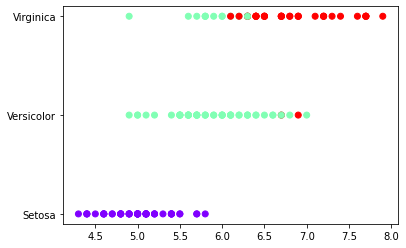

In [ ]:
plt.scatter(X[:,0], y, c = kmeans5.labels_, cmap='rainbow')

d) Perform Principle Component Analysis (PCA) on the data. Project the original data on the 2 largest principle components. Store this new projected 2-D data in a variable ***X_projected***.

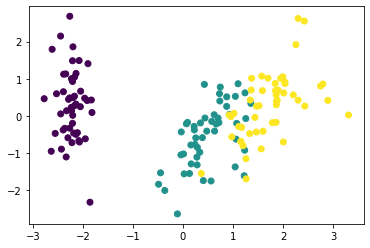

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

pca = PCA(n_components=2)
X_projected = pca.fit_transform(X)

plt.scatter(X_projected[:,0], X_projected[:,1], c=y)
plt.show()

Repeat part **b** on the new 2-D data. Train the Bottom-up Agglomerative model and visualize your results.

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

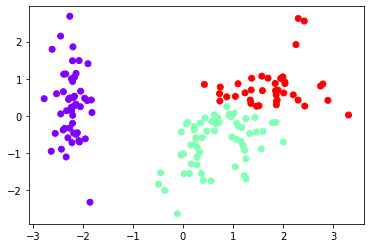

In [ ]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(X_projected)
plt.scatter(X_projected[:,0], X_projected[:,1], c=cluster.labels_, cmap='rainbow')


X_train_new2, X_test_new2, y_train2, y_test2 = train_test_split(X_projected, y, test_size = 0.2, random_state=20, stratify=y)
bua_pca2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
bua_pca2.fit(X_train_new2, y_train2)


Repeat part **c** on the new 2-D data. Train the K-means model and visualize your result.

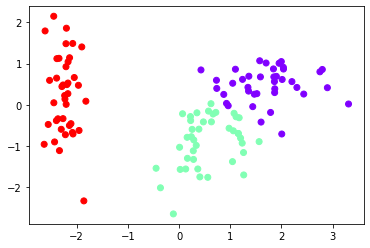

In [ ]:
kmeans5 = KMeans(n_clusters=3)
y_kmeans5 = kmeans5.fit_predict(X_train_new2)

kmeans5.cluster_centers_

plt.scatter(X_train_new2[:,0], X_train_new2[:,1], c=kmeans5.labels_, cmap='rainbow')

Compare the quality of 4-D and 2-D clusterings. When would the ideas of projection and dimensionality reduction be useful?

The 4-D clusterings seem to have more overlapping cluster points with each other, while in the 2-D clusterings, the clusters appear more separated out. Dimensionality reduction would be useful when we are trying to more easily interpret higher-dimensional data and could increase the model's test performance when the number of features in the data is reduced.

## Problem 2

In this problem, you will first implement the Naive Bayes (NB) algorithm from scratch. We will use a dataset for classifying if a patient has breast cancer. Each instance (row) in the dataset is a patient described by the 9 following features (with their corresponding values).

1. Clump Thickness: 1 - 10
2. Uniformity of Cell Size: 1 - 10
3. Uniformity of Cell Shape: 1 - 10
4. Marginal Adhesion: 1 - 10
5. Single Epithelial Cell Size: 1 - 10
6. Bare Nuclei: 1 - 10
7. Bland Chromatin: 1 - 10
8. Normal Nucleoli: 1 - 10
9. Mitoses: 1 - 10

Given these features, we will classify a car into one of the 2 classes: 0 (benign) or 1 (malignant).

NB is a very simple algorithm. Consider a feature X. For each value $x_i$ of X and each class label $y_j$, NB calculates the value of $P(X = x_i | Y = y_j)$. For example, take the feature Mitoses, NB will calculate all the following values:

- P(Mitoses = 1 | Class = 0), P(Mitoses = 2 | Class = 0), P(Mitoses = 3 | Class = 0), ... , P(Mitoses = 10 | Class = 0)
- P(Mitoses = 1 | Class = 1), P(Mitoses = 2 | Class = 1), P(Mitoses = 3 | Class = 1), ... , P(Mitoses = 10 | Class = 1)

Repeat this calculation for all the features. In the end, NB keep a recording of all possible $P(X | Y)$. The calculation itself is intuitive:

$$
 P(X = x_i | Y = y_j) = \frac{\text{Number of rows with } X = x_i \text{ and } Y = y_j}{\text{Number of rows with } Y = y_j}
$$

In addition, NB also calculate the priors probability $P(Y = y_j)$. Again, intuitively:

$$
 P(Y = y_i) = \frac{\text{Number of rows with } Y = y_j}{\text{Number of rows in the dataset}}
$$

Given a test example $X_{test} = \{ X_0 = x_0, X_1 = x_1, \ldots, X_i = x_i\}$, for each class label $y_j$, NB calculate:

$$
\begin{align}
 P(Y = y_j | X_{test}) & = P(X_{test} | Y = y_j)P(Y = y_j) \\
                       & = P(X_0 = x_0 | Y = y_j)P(X_1 = x_1 | Y = y_j) \ldots P(X_i = x_i | Y = y_j)P(Y = y_j)
\end{align}
$$

Such calculation is easy since we have bookkept all $P(X | Y)$ and all $P(Y)$ in previous steps. The output of the model is simply:

$$
 \underset{y_j}{\operatorname{argmax}} P(Y = y_j | X_{test})
$$

You will do each of these steps following this problem. We will use Pandas to deal with the data in this problem. Pandas can do queries like "Get all the rows in which Clump Thickness = 2 and Class = 1" with minimal syntax.


a) First let's load the dataset from **"breast-cancer-wisconsin.csv"** and store it in a Pandas dataframe. Try inspecting the dataframe and get used to the queries (this part is not graded). This guide is a good place to start:

https://medium.com/python-in-plain-english/filtering-rows-and-columns-in-pandas-python-techniques-you-must-know-6cdfc32c614c 

Split the dataset into a training set and a testing set. Use 10% of the data as the testing set (The splitting is graded).

In [100]:
from math import exp

cancer = pd.read_csv('/content/drive/My Drive/breast-cancer-wisconsin.csv')
X = cancer.iloc[:,0:9]
y = cancer.iloc[:,9]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

b) Now we will build up the bookkeeping. Let's start with the priors $P(Y = y_j)$, $y_j \in$ {0,1}. For each of these labels, calculate $P(Y = y_j)$ by simply counting the number of times $y_j$ appears in the dataset divided by the size of the dataset. You can bookkeep the priors in a dictionary with keys being $y_j$.

In [101]:
def find_params(X_train, y_train): 
    obs_count, feature_count = X_train.shape
    classes_count = len(np.unique(y_train))
    param_vals = (obs_count, feature_count, classes_count)
    return param_vals

param_vals = find_params(X_train, y_train)

Now let's calculate the conditional probability $P(X = x_i | Y = y_j)$. If you do the query with Pandas, this counting should be simple. This time, store the conditional probability in another dictionary with keys ($x_i$, $y_j$) or any data structure that you prefer. 

In [102]:
def get_stats_by_class(X_train, y_train, obs_count = param_vals[0], feature_count = param_vals[1]): 
    avg = {}
    var = {} 
    prior = {} 
    
    for i in range(classes_count): 
        X_class = X_train[y_train == i]
        avg[str(i)] = np.mean(X_class, axis=0)
        var[str(i)] = np.var(X_class, axis=0)
        prior[str(i)] = X_class.shape[0] / obs_count
        stats = (avg, var, prior)
    return stats


def get_gaussian(X, mean, std, obs_count=param_vals[0], feature_count=param_vals[1]): 
    const = -feature_count/2 * np.log(2*np.pi) - 0.5 * np.sum(np.log(std + 1e-6))
    probs = 0.5 * np.sum(np.power(X - mean, 2)/(std + 1e-6), 1)
    gaussian = const - probs
    return gaussian


def get_class_probs(X, class_mean, class_var, class_prior, num_classes=num_classes):
    num_examples = X.shape[0]
    probs = np.zeros((num_examples, num_classes))
    for i in range(num_classes): 
        probs_cls = get_gaussian(X, class_mean[str(i)], class_var[str(i)])
        probs[:, i] = probs_cls + np.log(class_prior[str(i)])
    return probs

That's it! You have successfully "trained" a NB model. Let's test our model on the test dataset.

Implement a **predict** function that returns $\underset{y_j}{\operatorname{argmax}} P(Y = y_j | X_{test})$ (refer to the description above). 

In [110]:
def predict(X_train, y_train, X_test): 
    obs_count, feature_count, classes_count = find_params(X_test, y_train)
    class_avg, class_var, class_prior = get_stats(X_train, y_train)
    probs = get_class_probs(X_test, class_avg, class_var, class_prior)
    return np.argmax(probs, 1)

Predict the label of all the instances in the test dataset, calculate and print out the accuracy.

In [111]:
from sklearn.metrics import accuracy_score
preds = predict(X_train, y_train, X_test)
print(f"predicted labels: {preds}")
print(f"accuracy:{accuracy_score(preds, y_test)}")


predicted labels: [0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0
 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1]
accuracy:0.9571428571428572


## Problem 3

In this problem, you will implement the Logistic Regression (LR) algorithm from scratch. Similar to NB, LR relies on $P(Y|X)$ to predict the class of an example. However, unlike NB, a generative model, LR is a discriminative model so it does not need to estimate $P(X|Y)$ and $P(Y)$. LR assumes the form of the conditional probability $P(Y|X)$ to be:

$$
    P(Y | X) = f(X) = \frac{1}{1 + e^{-(\alpha X + \beta)}}
$$

$f(X)$ returns a value in (0,1). The model classifies $X$ as $1$ if $f(X)$ is closer to $1$ and $0$ otherwise. We have to estimate the model parameters: the vector $\alpha$ and $\beta$ from the data, which we will do via stochastic gradient descent (SGD). In SGD, a training example is shown to the model each at a time. The model makes a prediction on the training example and the error between the prediction and the ground-truth label is used to update the model's parameters. We use the log-likelihood function to estimate the error in this problem. In particular, the log-likelihood for classifying the $X^{(i)}$ example with the ground-truth $y^{(i)}$ is: 

$$
    LL(y^{(i)},f(X^{(i)})) = y^{(i)} \log(f(X^{(i)})) + (1 - y^{(i)}) \log(1 - f(X^{(i)}))
$$

In our case, the updating is as the followings:

$$
\alpha_{j}(t+1) = \alpha_{j}(t) - \frac{\partial LL}{\partial \alpha_j} \times rate
$$

$$
\beta(t+1) = \beta(t) - \frac{\partial LL}{\partial \beta} \times rate
$$

where $rate$ is the how much change we want to make to the parameters in each update. Whenever we finish looping through all the instances in the dataset to update the parameters, we finish a training epoch. We may do many training epochs (looping through the dataset many times), until the model parameters converge.

First, we need to derive the formula for $\frac{\partial LL}{\partial \alpha_j}$ and $\frac{\partial LL}{\partial \beta}$. To keep the problem simple, these are provided to you:

$$
    \frac{\partial LL}{\partial \alpha_j} = (y^{(i)} - f(X^{(i)}))X^{(i)}_{j}
$$

$$
    \frac{\partial LL}{\partial \beta} = (y^{(i)} - f(X^{(i)}))
$$

a) We use the same dataset for predicting breast cancer in Problem 2 for this problem. Load the dataset and split it into a training set and a testing set.

In [113]:
cancer = pd.read_csv('/content/drive/My Drive/breast-cancer-wisconsin.csv')
X = cancer.iloc[:,0:9]
y = cancer.iloc[:,9]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

b) Learn the model parameters using SGD. A skeleton for SGD is provided to help you understand the process (You don't have to use the provided code). 

In [129]:
epochs = 20
rate = 0.01
SGD = pd.concat([x_train, y_train], axis=1).to_numpy()
coef = np.zeros(len(SGD[0]))

def predict(row, coefficients):
	yhat = coefficients[0]
	for i in range(len(row)-1):
		yhat += coefficients[i + 1] * row[i]
	return 1.0 / (1.0 + exp(-yhat))
 
def get_sgd_params(df, l_rate, n_epoch):
	for epoch in range(n_epoch):
		tot_error = 0
		for obs in df:
			y_hat = predict(obs, coef)
			tot_error += (obs[-1] - y_hat)**2
			coef[0] += (l_rate * (obs[-1] - y_hat) * y_hat * (1.0 - y_hat))
			for i in range(len(obs)-1):
				coef[i + 1] += (l_rate * (obs[-1] - y_hat) * y_hat * (1.0 - y_hat) * obs[i])
	return coef

coefs = get_sgd_params(SGD, rate, epochs)

c) Load the testing dataset. Use $f(X)$ to predict the labels of the test instances. Calculate the accuracy.

In [130]:
y_pred = []
for i in x_test.to_numpy():
  y_i = round(predict(i, coefs))
  y_pred.append(y_i)

test_accuracy = accuracy_score(y_pred, y_test)
test_accuracy

0.9428571428571428

## Problem 4

In this problem, you will investigate how the size of the training data on the performance of a generative model (NB) and a discriminative model (LR). **You are free to use scikit-learn's NB and LR.** 

a) Load the breast cancer training dataset and split it into a training set and a testing set. 

In [ ]:
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

X_train_prev, X_test_prev, y_train_prev, y_test_prev = train_test_split(X, y, test_size = 0.1)

b) We will train NB classifiers that use only a portion of the training data. Let's vary this portion from 1% to 100% of the training set. For each portion value, sample the training set according to the portion, train a NB classifer on this portion of the training set, and evaluate the model accuracy on the testing set.  

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

                            
nb_classifier = MultinomialNB()
array = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
accuraries_nb = {}

for i in array: 
    X_train, _, y_train, _ = train_test_split(X, y, train_size = i)
    nb_classifier.fit(X_train,y_train)   
    test = nb_classifier.score(X_test_prev, y_test_prev) 
    accuraries_nb[i] = test

print(accuraries_nb)

{0.01: 0.5263157894736842, 0.05: 0.8771929824561403, 0.1: 0.8596491228070176, 0.15: 0.8771929824561403, 0.2: 0.8596491228070176, 0.25: 0.8947368421052632, 0.3: 0.8771929824561403, 0.35: 0.8947368421052632, 0.4: 0.8596491228070176, 0.45: 0.8596491228070176, 0.5: 0.8596491228070176, 0.55: 0.8771929824561403, 0.6: 0.8596491228070176, 0.65: 0.8596491228070176, 0.7: 0.8596491228070176, 0.75: 0.8596491228070176, 0.8: 0.8596491228070176, 0.85: 0.8596491228070176, 0.9: 0.8596491228070176, 0.95: 0.8596491228070176, 1: 0.47368421052631576}


Plot the accuracies of the models versus the portion of the training set used. Comment on the effect of increasing the size of the training dataset on the performance of NB.

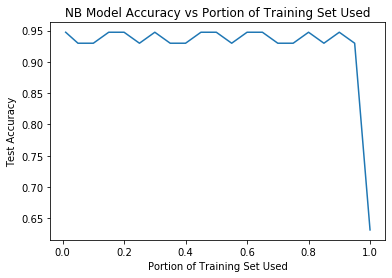

In [ ]:
lists = sorted(dicto.items()) 
x, y = zip(*lists)
plt.plot(x, y)
plt.xlabel("Portion of Training Set Used")
plt.ylabel("Test Accuracy")
plt.title("NB Model Accuracy vs Portion of Training Set Used")
plt.show()

c) Repeat part **b** with LR.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

array2 = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]

X = cancer.data
y = cancer.target
X_train_prev, X_test_prev, y_train_prev, y_test_prev = train_test_split(X, y, test_size = 0.1)

accuraries_lr = {}
for i in array2:
    X_train, X_test_new, y_train, y_test_new = train_test_split(X_train_prev,y_train_prev, train_size = i)
    lr_classifier = LogisticRegression()
    lr_classifier.fit(X_train_prev, y_train_prev)
    pred = lr_classifier.predict(X_test_new)
    accuraries_lr[i] = accuracy_score(y_test_new, pred)
accuraries_lr

/Users/allisonyih/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/allisonyih/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

/Users/allisonyih/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/allisonyih/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

{0.01: 0.9428007889546351,
 0.05: 0.9507186858316222,
 0.1: 0.9479392624728851,
 0.15: 0.9472477064220184,
 0.2: 0.9365853658536586,
 0.25: 0.9453125,
 0.3: 0.9526462395543176,
 0.35: 0.933933933933934,
 0.4: 0.9512987012987013,
 0.45: 0.9326241134751773,
 0.5: 0.953125,
 0.55: 0.935064935064935,
 0.6: 0.9609756097560975,
 0.65: 0.9222222222222223,
 0.7: 0.9675324675324676,
 0.75: 0.9140625,
 0.8: 0.9514563106796117,
 0.85: 0.961038961038961,
 0.9: 0.9423076923076923,
 0.95: 1.0,
 1: 0.9432485322896281}

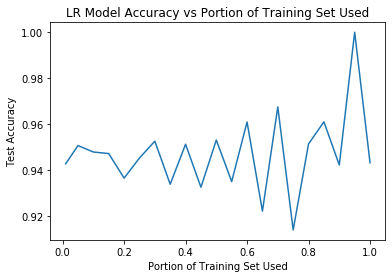

In [ ]:
lists = sorted(accuraries_lr.items()) 
x, y = zip(*lists)
plt.plot(x, y)
plt.xlabel("Portion of Training Set Used")
plt.ylabel("Test Accuracy")
plt.title("LR Model Accuracy vs Portion of Training Set Used")
plt.show()

Between a generative model (NB) and a discriminative model (LR), which is more affected by small training dataset? Think about a reason for this.

A discriminative model would be more affected by a small training dataset, because for a generative model, they do not have as many assumptions as the discriminative model does, which causes them not to overfit on smaller sets of data.

## Problem 5

What is the hyperparameters, the parameters, and the objective function for finding the best hypothesis for each of the following methods:

1. Decision Tree (Entropy gain)
2. Support Vector Machine
3. K-nearest Neighbors Clustering

For a decision tree, its hyperparameters include the depth of the tree, minimum amount of data points per leaf node, and the maximum amount of child nodes. Parameters could include the criteria used to split the tree's branches and the random state. Its objective function would be to have a greater decrease in Gini index or Cross-Entropy.

For a SVM, its hyperparameters include gamma and the C trade-off parameters in the kernel function. Parameters include the decision boundary's variable coefficients. The SVM's objective function is finding a hyperplane that would maximize its margin from the decision boundary.


For KNN clustering, its hyperparameters include the number of neighbors. A parameter would be the position of the point's neighbors. The KNN's objective function is finding the optimal k value that minimizes the misclassification test error rate on new, unseen observations. 